## Importing  Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
Sd=StandardScaler()
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import streamlit as st

In [4]:
cars = pd.read_csv('carsEDA.csv')
cars.head(7)

,Name,Year,Company,Transmission,KM_Driven,Fuel_Type,Owner,Registration,City,Original_Price,Sales_Price,Month,EMI(₹)
0,Maruti New Wagon-R LXI CNG 1.0 L,2020,Maruti,MANUAL,20724,Petrol + CNG,1st Owner,DL-1C,New Delhi,594699,594699,Sep,11626
1,Maruti Celerio ZXI OPT AMT,2017,Maruti,AUTOMATIC,87848,Petrol,1st Owner,TS-08-x-xxxx,Hyderabad,465799,454899,Jan,8893
2,Hyundai i10 ERA 1.1 IRDE,2010,Hyundai,MANUAL,60476,Petrol,2nd Owner,KL-40,Kochi,229099,193099,Aug,3775
3,Maruti Alto 800 LXI,2013,Maruti,MANUAL,40700,Petrol,1st Owner,TN-12-x-xxxx,Chennai,256699,256699,Jul,5019
4,Mahindra XUV 3OO W8 (O) AT,2021,Mahindra,MANUAL,4022,Petrol,1st Owner,MH-12,Pune,1213099,1213099,Dec,22781
5,Skoda Rapid AMBITION 1.6 MPFI MT,2017,Skoda,MANUAL,46204,Petrol,1st Owner,KL-07,Kochi,611199,611199,Apr,11949
6,Volkswagen Polo HIGHLINE1.2L PETROL,2013,Volkswagen,MANUAL,39352,Petrol,2nd Owner,MH-01,Mumbai,388299,388299,Apr,7591


## Visualization:

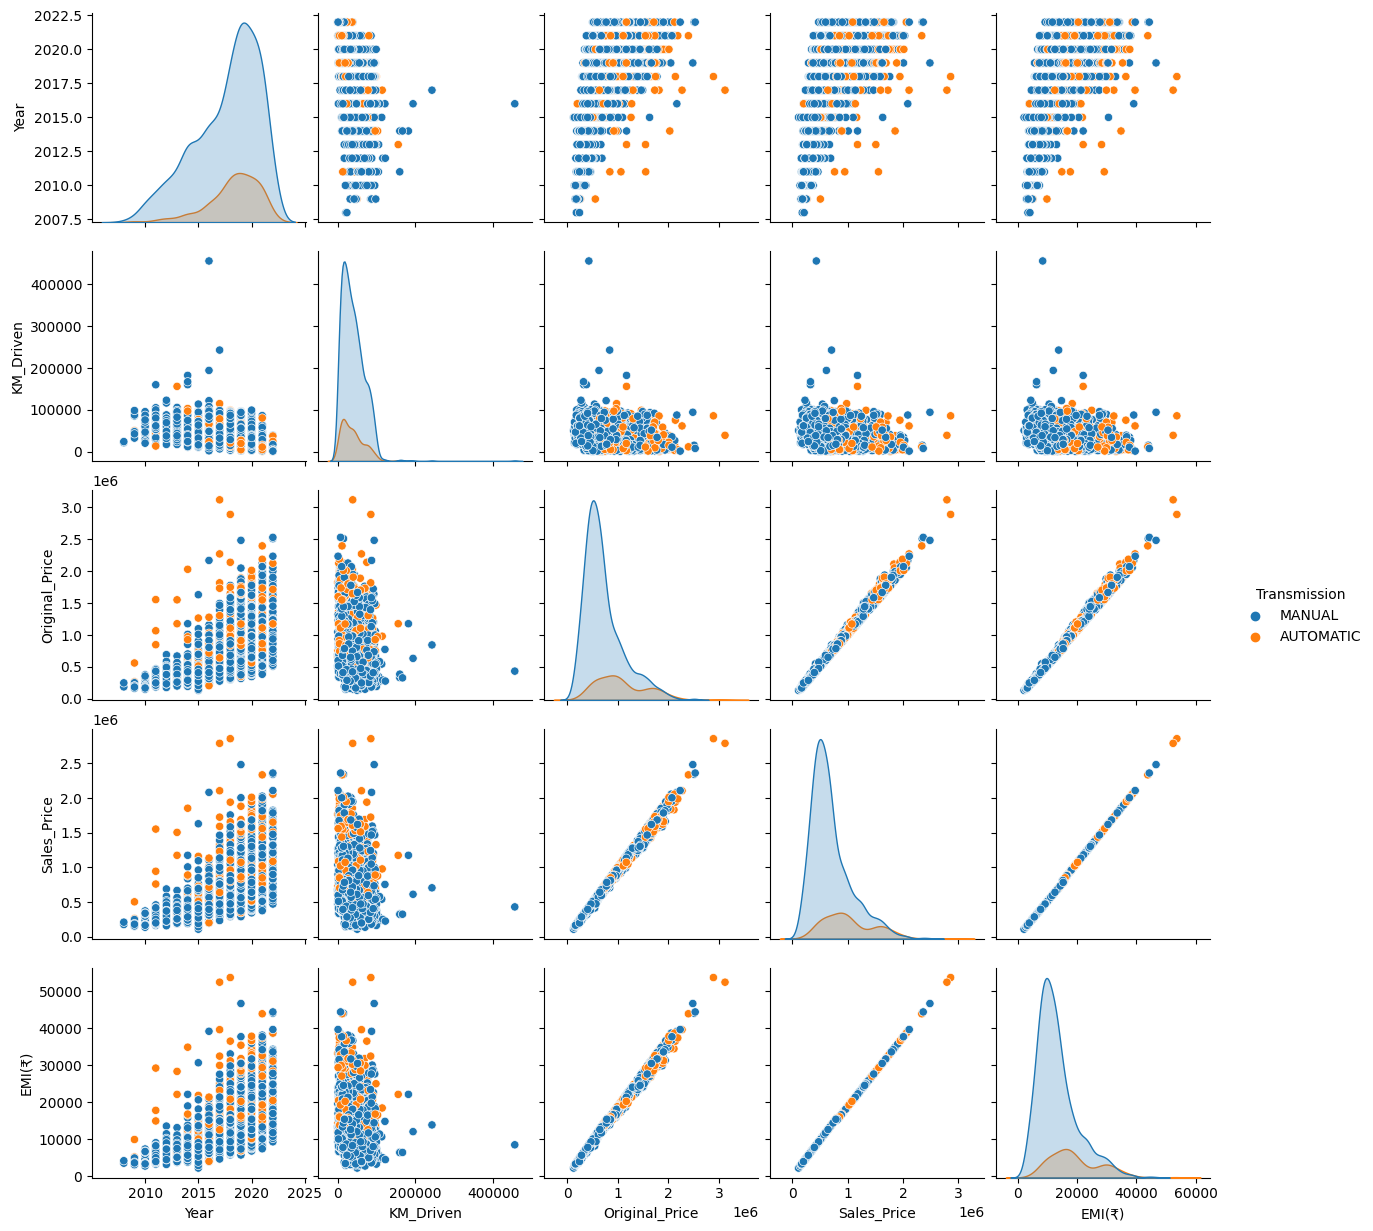

In [5]:
sns.pairplot(cars, hue='Transmission')

<AxesSubplot: >

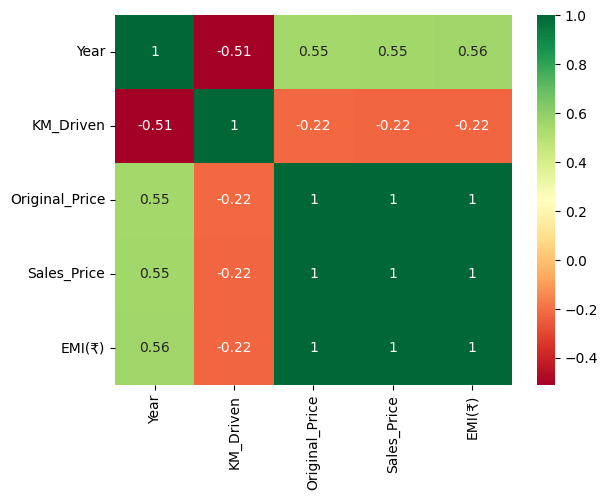

In [6]:
corrmat = cars.corr()
top_corr_features = corrmat.index
sns.heatmap(cars[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Checking relationship of Company with Sales Price

In [7]:
cars['Company'].unique()

array(['Maruti', 'Hyundai', 'Mahindra', 'Skoda', 'Volkswagen', 'Ford',
       'Tata', 'Renault', 'Toyota', 'MG', 'Honda', 'Nissan', 'KIA',
       'Jeep', 'SKODA', 'Jaguar', 'Datsun', 'MARUTI', 'Mercedes', 'Fiat',
       'Chevrolet'], dtype=object)

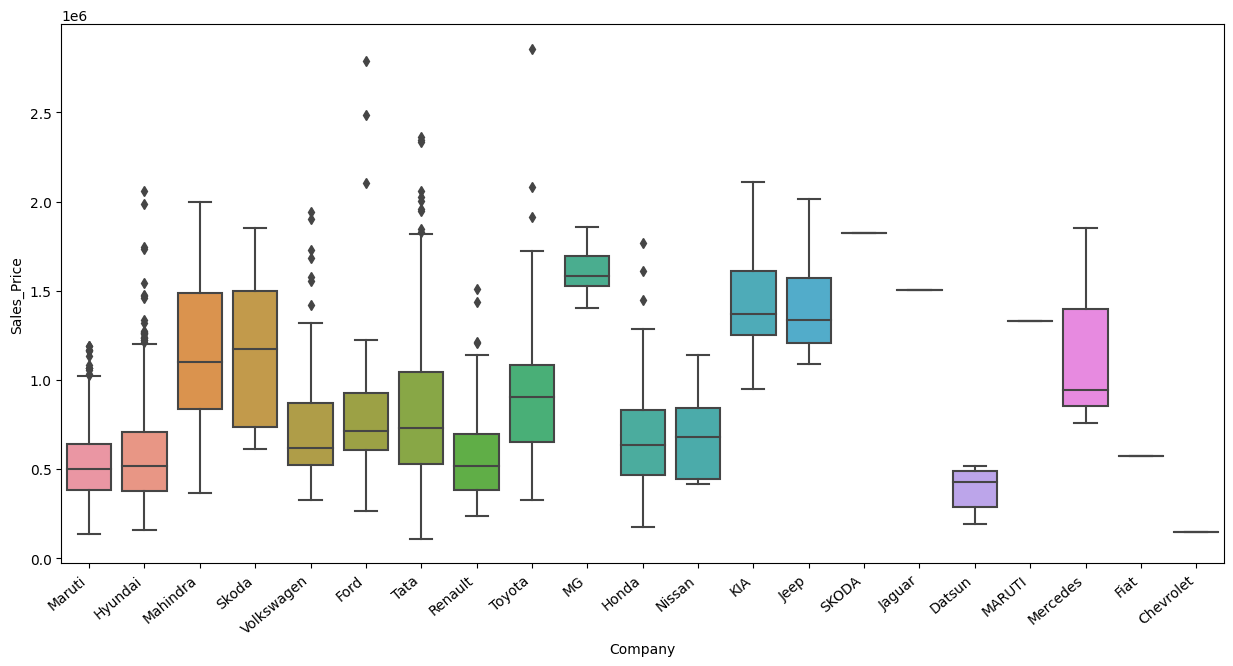

In [8]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='Company',y='Sales_Price',data=cars)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of Year with Sales Price

In [9]:
import warnings
warnings.filterwarnings('ignore')

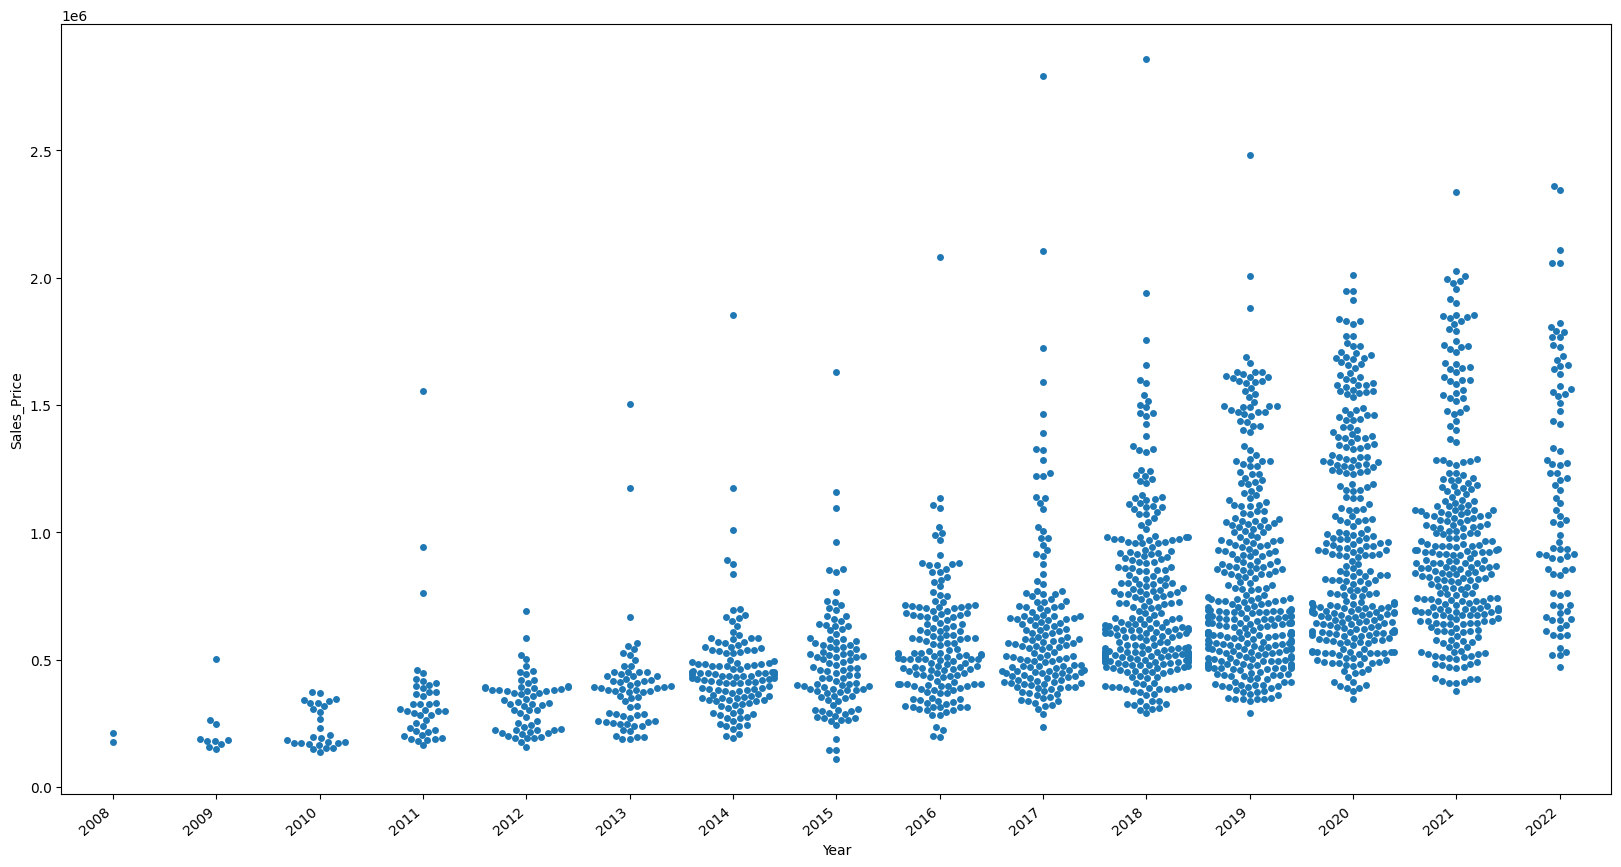

In [10]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='Year',y='Sales_Price',data=cars)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of KM_Driven with Sales Price

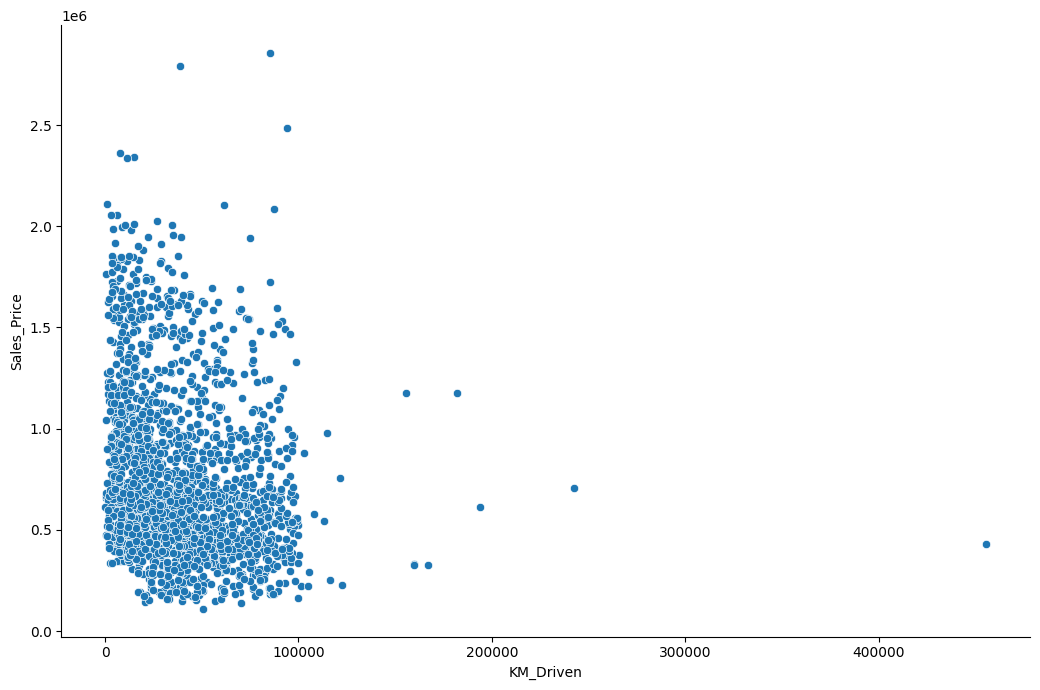

In [11]:
sns.relplot(x='KM_Driven',y='Sales_Price',data=cars,height=7,aspect=1.5)

### Checking relationship of Fuel Type with Sales Price

<AxesSubplot: xlabel='Fuel_Type', ylabel='Sales_Price'>

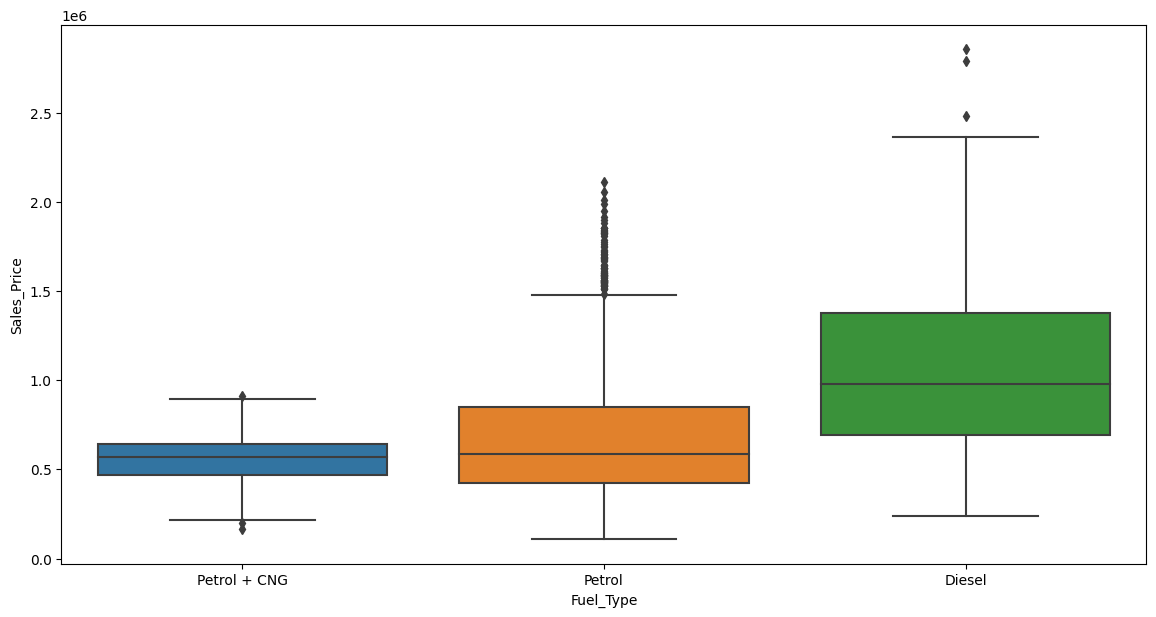

In [12]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='Fuel_Type',y='Sales_Price',data=cars)

### Relationship of Sales Price with FuelType, Year and Company mixed

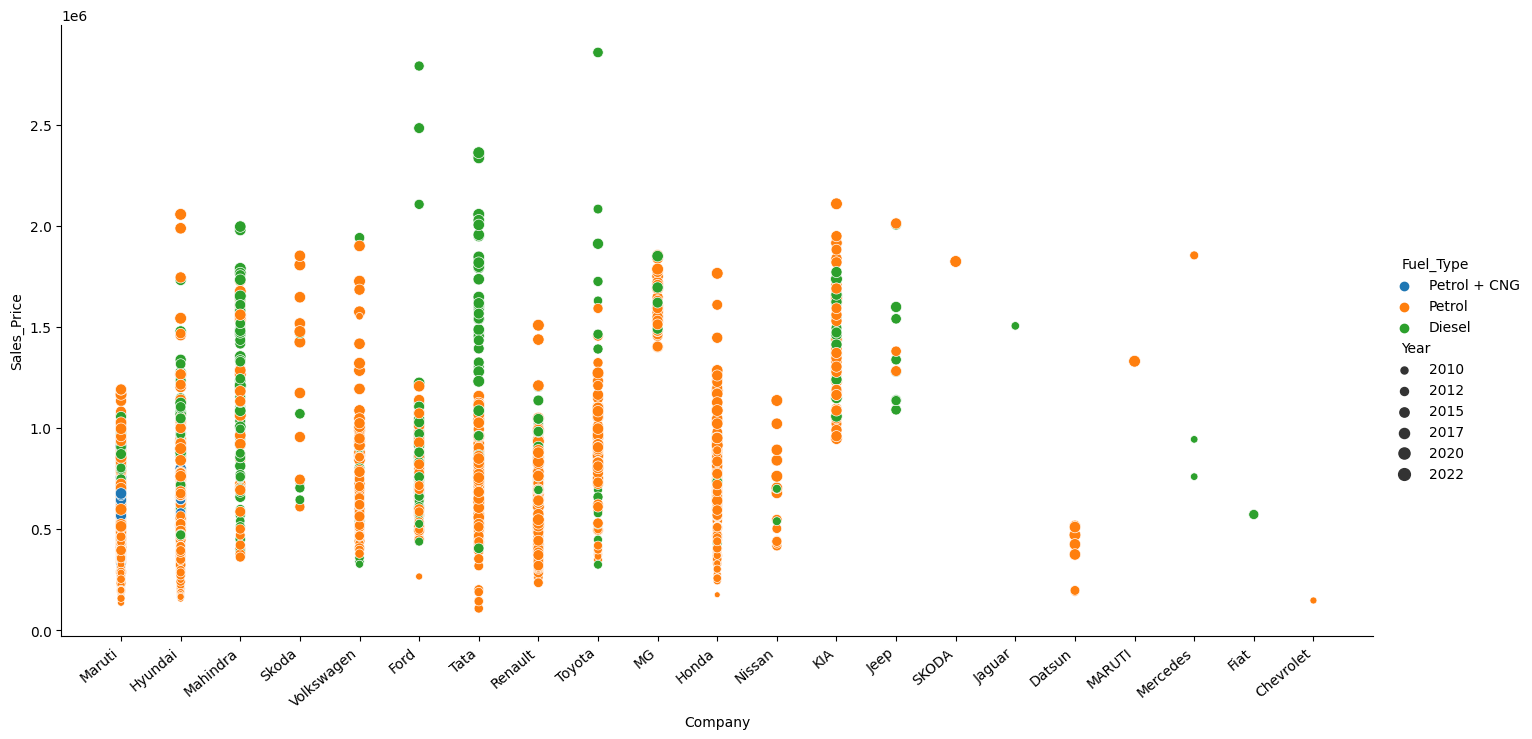

In [13]:
ax=sns.relplot(x='Company',y='Sales_Price',data=cars,hue='Fuel_Type',size='Year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

### Checking relationship of EMI with Sales Price for hue as Company

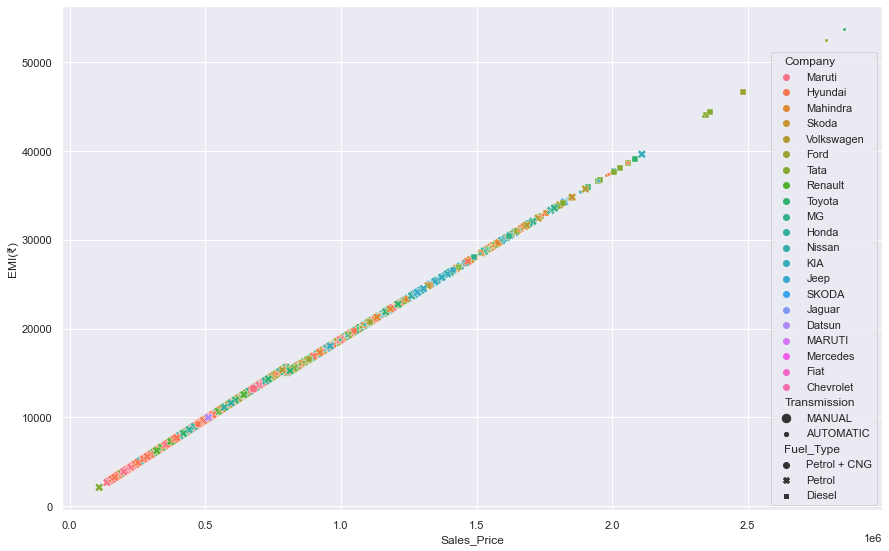

In [15]:
sns.scatterplot (x= "Sales_Price" , y = "EMI(₹)" , hue = "Company" , style = "Fuel_Type" , size = "Transmission" , data = cars   )
sns.set(rc= {'figure.figsize' :(14.7 , 9.27)})

# Model Building:

## 1. Linear Regression:


### Extracting Training Data

In [15]:
x=cars[['Name','Company','Transmission','Year','KM_Driven','Fuel_Type','City']]
y=cars['Sales_Price']

In [16]:
x

,Name,Company,Transmission,Year,KM_Driven,Fuel_Type,City
0,Maruti New Wagon-R LXI CNG 1.0 L,Maruti,MANUAL,2020,20724,Petrol + CNG,New Delhi
1,Maruti Celerio ZXI OPT AMT,Maruti,AUTOMATIC,2017,87848,Petrol,Hyderabad
2,Hyundai i10 ERA 1.1 IRDE,Hyundai,MANUAL,2010,60476,Petrol,Kochi
3,Maruti Alto 800 LXI,Maruti,MANUAL,2013,40700,Petrol,Chennai
4,Mahindra XUV 3OO W8 (O) AT,Mahindra,MANUAL,2021,4022,Petrol,Pune
...,...,...,...,...,...,...,...
2026,Renault Duster RXZ CVT 1.3 TURBO,Renault,AUTOMATIC,2021,10821,Petrol,New Delhi
2027,KIA SELTOS GTX PLUS 1.4G DCT DUAL TONE,KIA,MANUAL,2022,1114,Petrol,Bangalore
2028,Volkswagen Polo HIGH LINE PLUS 1.0,Volkswagen,MANUAL,2020,17595,Petrol,Pune
2029,Renault TRIBER 1.0 RXZ,Renault,MANUAL,2020,33419,Petrol,Hyderabad


In [17]:
y.shape

(2031,)

### Applying Train Test Split

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

#### Creating an OneHotEncoder object to contain all the possible categories

In [20]:
OHE=OneHotEncoder()
OHE.fit(x[['Name','Company','Transmission','Fuel_Type','City']])

OneHotEncoder()

In [21]:
column_trans=make_column_transformer((OneHotEncoder(categories=OHE.categories_),['Name','Company','Transmission','Fuel_Type','City']),
                                    remainder='passthrough')

## Azure ML Pipeline Model :

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()

In [24]:
pipe = make_pipeline(column_trans,lr)

In [25]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Chevrolet Beat LS PETROL', 'Datsun Go Plus T (O) CVT',
       'Datsun Go T', 'Datsun Redi Go 1.0 T(O)', 'Datsun Redi Go T (O)',
       'Fiat URBAN CROSS EMOTION MULTIJET 1.3',
       'Ford Ecosport 1.0 ECOBOOST TITANIUM',
       'Ford Ecosport 1.0 ECOBOOST TITANIUM OPT',
       'F...
       'Toyota', 'Volkswagen'], dtype=object),
                                                                            array(['AUTOMATIC', 'MANUAL'], dtype=object),
                                                                            array(['Diesel', 'Petrol', 'Petrol + CNG'], dtype=object),
                                                                            array(['Ahmedabad', 'Bangalore', 'Chennai', 'Howrah', 'Hyderabad',
       'Indore', 'Jaipur', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'New Delhi', 'Pune'], dtype=object)]),
                                                  ['Name', 'Company',
                                                   'Transmission', 'Fuel_Type',
                                                   'City'])])),
                ('linearregression', LinearRegression())])

In [26]:
y_pred = pipe.predict(x_test)

In [28]:
r2_score(y_test,y_pred)

0.8364779914690166

#### Finding the model with a random state of TrainTestSplit :

In [28]:
scores=[]
for i in range(2000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

In [30]:
np.argmax(scores)

1271

In [31]:
scores[np.argmax(scores)]

0.9262492913494655

## Actual Vs Predicted :

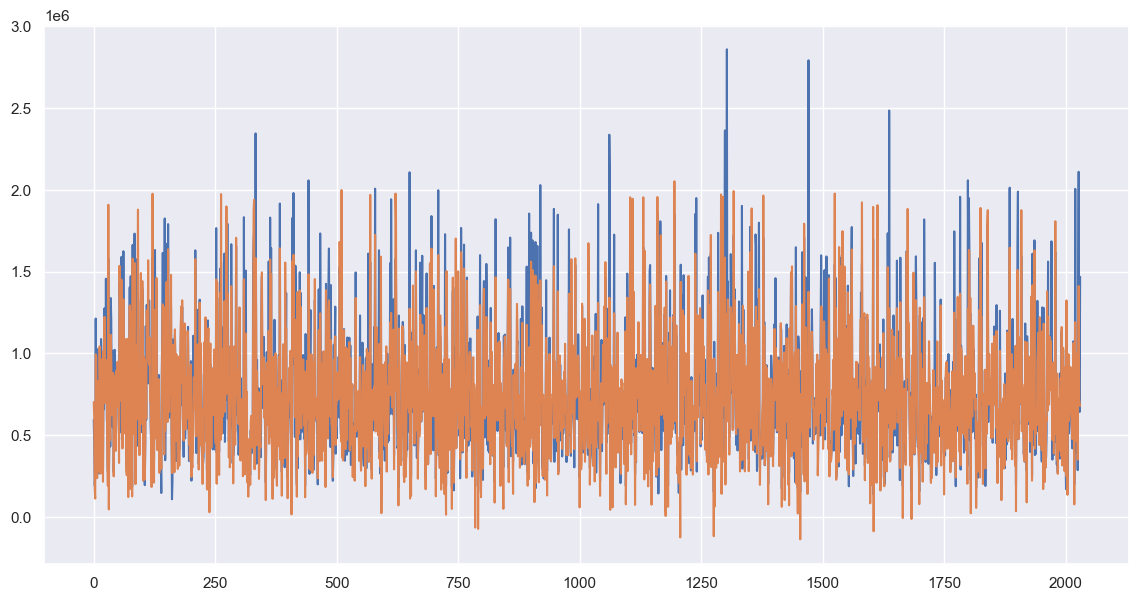

In [31]:
#Comparing original Data's Scatterplot with Regressed model
plt.subplots(figsize=(14,7))
plt.plot(cars.Sales_Price)
plt.plot(pipe.predict(cars))      
plt.show()

### From this model we can predict sales price of the future upcoming cars :

In [32]:
price = pipe.predict(pd.DataFrame(columns=x_test.columns,data=np.array(['Renault TRIBER 1.0 RXZ','Renault','MANUAL',2018,33419,'Petrol','Hyderabad']).reshape(1,7)))
print("The sales price will be:", np.round(price,2))

The sales price will be: [565765.57]


In [33]:
price = pipe.predict(pd.DataFrame(columns=x_test.columns,data=np.array(['Hyundai Creta 1.6 SX AT CRDI','Hyundai','AUTOMATIC',2015,17439,'Diesel','Bangalore']).reshape(1,7)))
print("The sales price will be:", np.round(price,2))

The sales price will be: [1175101.91]


In [34]:
price = pipe.predict(pd.DataFrame(columns=x_test.columns,data=np.array(['KIA SELTOS GTX PLUS 1.4G DCT DUAL TONE','KIA','MANUAL',2022,5842,'Diesel','Pune']).reshape(1,7)))
print("The sales price will be:", np.round(price,2))

The sales price will be: [1533362.47]


## 2. Random Forest Regressor :

In [35]:
# One Hot Encoding
cr7 = pd.get_dummies(cars,columns=['Name','Company','Transmission','Owner','Fuel_Type','City']) 

In [36]:
x1=cr7.drop(['Registration','Month','Original_Price','EMI(₹)','Sales_Price'], axis=1)
y1=cars[['Sales_Price']]
x1.head()

,Year,KM_Driven,Name_Chevrolet Beat LS PETROL,Name_Datsun Go Plus T (O) CVT,Name_Datsun Go T,Name_Datsun Redi Go 1.0 T(O),Name_Datsun Redi Go T (O),Name_Fiat URBAN CROSS EMOTION MULTIJET 1.3,Name_Ford Ecosport 1.0 ECOBOOST TITANIUM,Name_Ford Ecosport 1.0 ECOBOOST TITANIUM OPT,...,City_Howrah,City_Hyderabad,City_Indore,City_Jaipur,City_Kochi,City_Kolkata,City_Lucknow,City_Mumbai,City_New Delhi,City_Pune
0,2020,20724,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2017,87848,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2010,60476,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2013,40700,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021,4022,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

#### RandomForestRegressor :

In [38]:
kfold = KFold(n_splits=7, random_state=14, shuffle=True)
RandomForest = RandomForestRegressor(n_estimators=62, criterion='mse', max_features=7)

In [39]:
RF = cross_val_score(RandomForest, x1, y1, cv=kfold)
print(RF.mean())

0.755192527926978


## 3. Decision Tree Regressor :

In [40]:
from sklearn.tree import  DecisionTreeRegressor
from sklearn import preprocessing
import ppscore as pps

In [41]:
cars2 = pd.read_csv('carsEDA.csv')
cars2.shape

(2031, 13)

##### Label Encoding:

In [42]:
label_encoder = preprocessing.LabelEncoder()
cars2['Name']= label_encoder.fit_transform(cars2['Name'])
cars2['Company']= label_encoder.fit_transform(cars2['Company'])
cars2['Transmission']= label_encoder.fit_transform(cars2['Transmission'])
cars2['Fuel_Type']= label_encoder.fit_transform(cars2['Fuel_Type'])
cars2['Owner']= label_encoder.fit_transform(cars2['Owner'])
cars2['Month']= label_encoder.fit_transform(cars2['Month'])
cars2['City']= label_encoder.fit_transform(cars2['City'])

In [43]:
x2=cars2.drop(['Original_Price','Month','Registration','EMI(₹)','Sales_Price'], axis=1)
y2=cars2[['Sales_Price']]
x2.head()

,Name,Year,Company,Transmission,KM_Driven,Fuel_Type,Owner,City
0,387,2020,12,1,20724,2,0,11
1,358,2017,12,0,87848,1,0,4
2,198,2010,5,1,60476,1,1,7
3,332,2013,12,1,40700,1,0,2
4,310,2021,11,1,4022,1,0,12


#### Checking pp score :

In [44]:
pps.matrix(cars2)        #calculate the whole PPS matrix

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Name,Name,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Name,Year,0.412273,regression,True,mean absolute error,2.331856,1.370494,DecisionTreeRegressor()
2,Name,Company,0.998326,regression,True,mean absolute error,4.707533,0.007881,DecisionTreeRegressor()
3,Name,Transmission,0.647782,regression,True,mean absolute error,0.170852,0.060177,DecisionTreeRegressor()
4,Name,KM_Driven,0.071517,regression,True,mean absolute error,22255.722797,20664.065252,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
164,EMI(₹),City,0.000000,regression,True,mean absolute error,3.551452,4.397045,DecisionTreeRegressor()
165,EMI(₹),Original_Price,0.903290,regression,True,mean absolute error,318850.045298,30835.857044,DecisionTreeRegressor()
166,EMI(₹),Sales_Price,0.995539,regression,True,mean absolute error,301887.073363,1346.682829,DecisionTreeRegressor()
167,EMI(₹),Month,0.000000,regression,True,mean absolute error,3.072871,3.982216,DecisionTreeRegressor()


In [45]:
pps.score(cars2, "Sales_Price", "KM_Driven")

{'x': 'Sales_Price',
 'y': 'KM_Driven',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 22255.722796651895,
 'model_score': 28471.839825675448,
 'model': DecisionTreeRegressor()}

### Decision Tree Regression :

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2, random_state=21)

In [47]:
DecisionTree = DecisionTreeRegressor()
DecisionTree.fit(x_train, y_train)

DecisionTreeRegressor()

In [48]:
DecisionTree.score(x_test,y_test)           #Accuracy

0.6771557889572573

## 4. Bagged Decision Tree Regression:

In [49]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import BaggingRegressor

In [50]:
cart = DecisionTreeRegressor()
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
Bagging = BaggingRegressor(base_estimator=cart, n_estimators=100, random_state=7)
Bagging_DT = cross_val_score(Bagging, x2, y2, cv=kfold)
print(Bagging_DT.mean())

0.78647085552384


## 5. AdaBoost Regressor:

In [51]:
from sklearn.ensemble import AdaBoostRegressor

In [52]:
kfold = KFold(n_splits=12, random_state=7, shuffle=True)
AdaBoost = AdaBoostRegressor(n_estimators=10, random_state=7)

In [53]:
Adaboost = cross_val_score(AdaBoost, x2, y2, cv=kfold)
print(Adaboost.mean())

0.49103313444079605


## 6.ANN model :

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x2,y2,train_size=0.80,random_state=50)

In [56]:
from sklearn.preprocessing import StandardScaler
Sd=StandardScaler()

In [57]:
X_train=Sd.fit_transform(X_train)
X_test=Sd.transform(X_test)

In [58]:
SQ=Sequential()

## input layer 
SQ.add(Dense(units=2031,activation='ReLU'))

## hidden layer 1 
SQ.add(Dense(units=2000,activation='ReLU'))
SQ.add(Dropout(0.3))

## hidden layer 2
SQ.add(Dense(units=1550,activation='LeakyReLU'))
SQ.add(Dropout(0.2))

## hidden layer 3
SQ.add(Dense(units=2500,activation='ReLU'))
SQ.add(Dropout(0.2))

## output layer
SQ.add(Dense(units=1,activation='linear'))

SQ.compile(optimizer='adam', loss='Huber', metrics=['mse'])

In [59]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [60]:
ANN=SQ.fit(X_train,Y_train,validation_split=0.2,batch_size=10,epochs=300,callbacks=early_stopping)

Epoch 1/300
130/130 [==============================] - 22s 164ms/step - loss: 337779.6250 - mse: 227448438784.0000 - val_loss: 201559.1719 - val_mse: 91933868032.0000
Epoch 2/300
130/130 [==============================] - 22s 169ms/step - loss: 193961.6250 - mse: 79184707584.0000 - val_loss: 204293.5469 - val_mse: 82175123456.0000
Epoch 3/300
130/130 [==============================] - 22s 170ms/step - loss: 191146.2969 - mse: 78338048000.0000 - val_loss: 192635.3594 - val_mse: 80168632320.0000
Epoch 4/300
130/130 [==============================] - 23s 178ms/step - loss: 187417.2500 - mse: 74760855552.0000 - val_loss: 193492.2656 - val_mse: 86591963136.0000
Epoch 5/300
130/130 [==============================] - 21s 160ms/step - loss: 186689.3594 - mse: 73435471872.0000 - val_loss: 191952.6094 - val_mse: 75838816256.0000
Epoch 6/300
130/130 [==============================] - 21s 160ms/step - loss: 189645.1719 - mse: 75914952704.0000 - val_loss: 190668.9688 - val_mse: 76667559936.0000
Epo

In [61]:
ANN_pre=SQ.predict(X_test)

13/13 [==============================] - 0s 12ms/step


In [62]:
print(r2_score(ANN_pre,Y_test))  # Accuracy

0.5903444613261818


### Epoch Vs Loss (Train & Test Dataset)

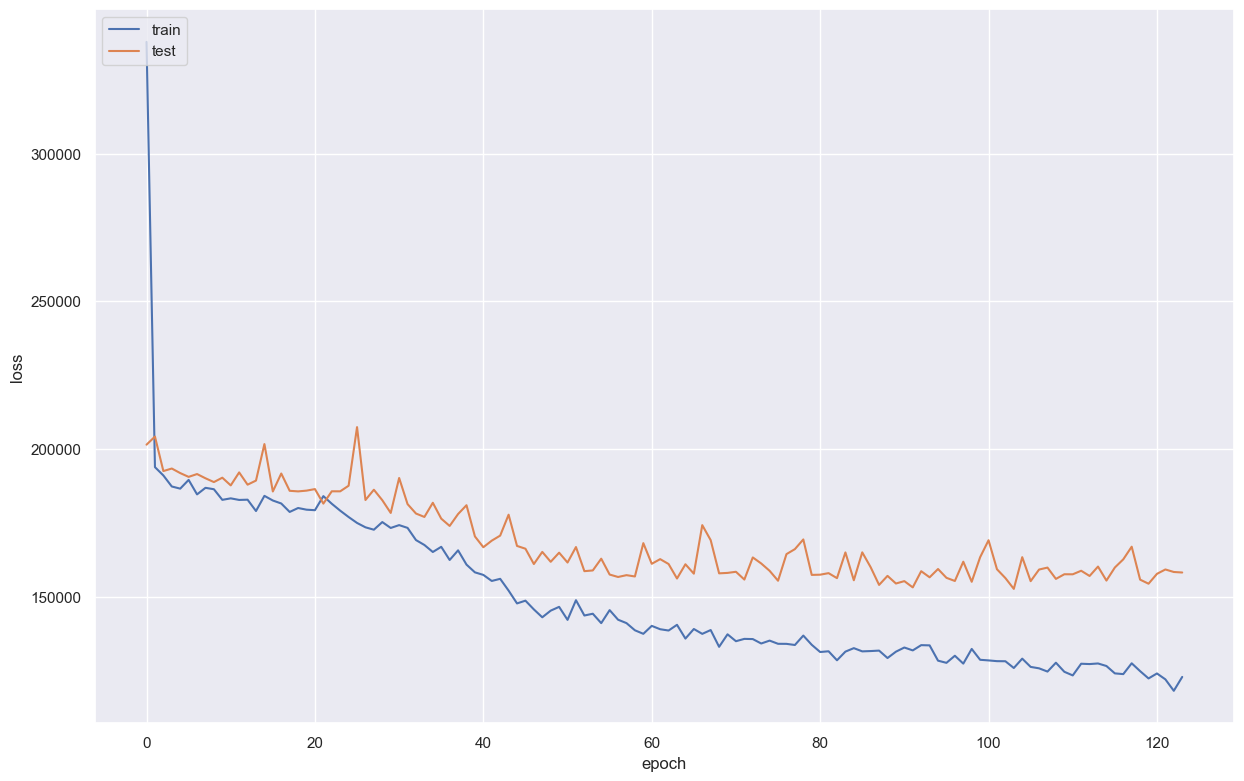

In [63]:
plt.plot(ANN.history['loss'])
plt.plot(ANN.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

### Epoch Vs Error (Train & Test Dataset)

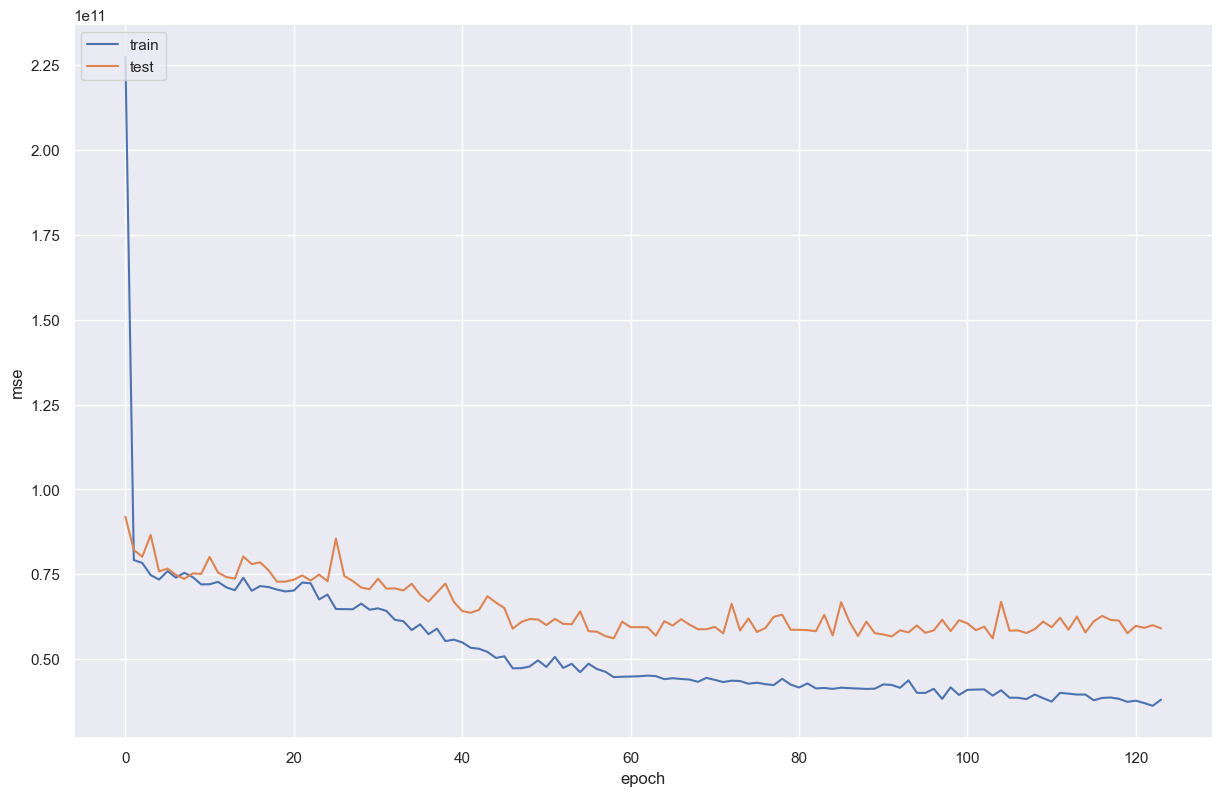

In [64]:
plt.plot(ANN.history['mse'])
plt.plot(ANN.history['val_mse'])
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [65]:
import pickle

In [66]:
pickle.dump(pipe,open('RegressionModel.pkl','wb'))

In [67]:
#pip freeze

#### Inference : From above 6 models we choose the Linear Regression Pipeline Model for Deployment which is giving highest accuracy i.e. 92.63%